In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings

warnings.filterwarnings('ignore')
print(os.listdir("Data"))

['Mall_Customers.csv']


# Load Data

In [2]:
df = pd.read_csv('Data/Mall_Customers.csv')
df.sample(5)
print('Data dimensions {} ROWS and {} COLUMNS'.format(*df.shape))

Data dimensions 200 ROWS and 5 COLUMNS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


- No missing values
- Gender is categorical, rest are continuous

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Renaming columns for ease in typing

In [5]:
df.rename(index=str, columns={'Annual Income (k$)': 'Annual Income',
                              'Spending Score (1-100)': 'Spending Score'}, inplace=True)
df.sample(5)

,CustomerID,Gender,Age,Annual Income,Spending Score
117,118,Female,49,65,59
55,56,Male,47,43,41
123,124,Male,39,69,91
23,24,Male,31,25,73
21,22,Male,25,24,73


In [6]:
df.nunique()

CustomerID        200
Gender              2
Age                51
Annual Income      64
Spending Score     84
dtype: int64

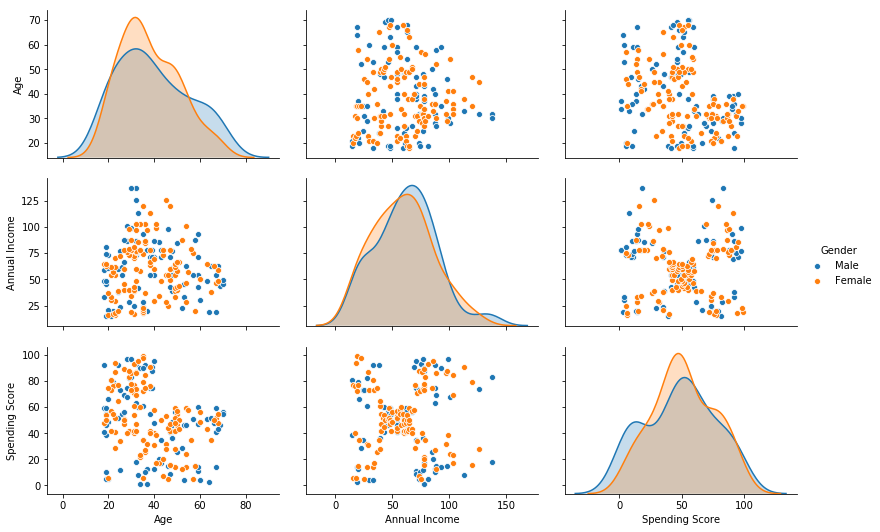

In [7]:
# Checking data distribution
# Pairplots (Colors based on gender)
sns.pairplot(df.drop('CustomerID', axis = 1), hue = 'Gender', aspect=1.5)
plt.show()

# K-Means Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
list_clusters = []

# Removing Customer ID and Gender
data_for_clustering = df.drop(['CustomerID', 'Gender'], axis=1)
# Looping through number of clusters
for i in range(1, 12):
    k_means_cluster = KMeans(n_clusters = i).fit(data_for_clustering)
    # inertia_ : Sum of squared distances of samples to their closest cluster center.
    list_clusters.append(k_means_cluster.inertia_)

In [10]:
for cluster_data in list_clusters:
    print(cluster_data)

308812.78
212840.16982097185
143342.751571706
104366.15145556198
75350.77917248776
58300.44332159069
51118.949931647294
44307.87341670445
40901.2569014319
37051.184000559384
34329.61278874105


## Search for Elbow

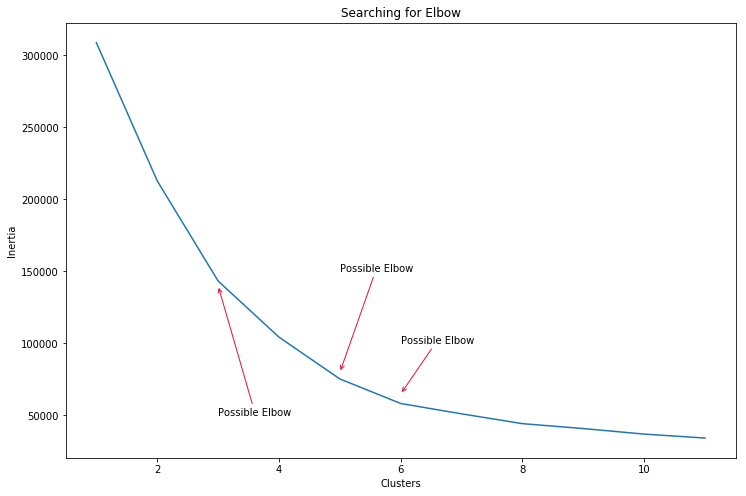

In [11]:
# Create empty plot
fig, ax = plt.subplots(figsize=(12, 8))
# Create line plot
# y axis is list of clusters inertia
# x axis is number of clusters
sns.lineplot(x=list(range(1, 12)), y=list_clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='crimson', lw=1))

ax.annotate('Possible Elbow', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='crimson', lw=1))

ax.annotate('Possible Elbow', xy=(6, 65000), xytext=(6, 100000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='crimson', lw=1))

plt.show()

- Elbow marks the points where there is a significant shift in inertia
- 3, 5

### 3 clusters

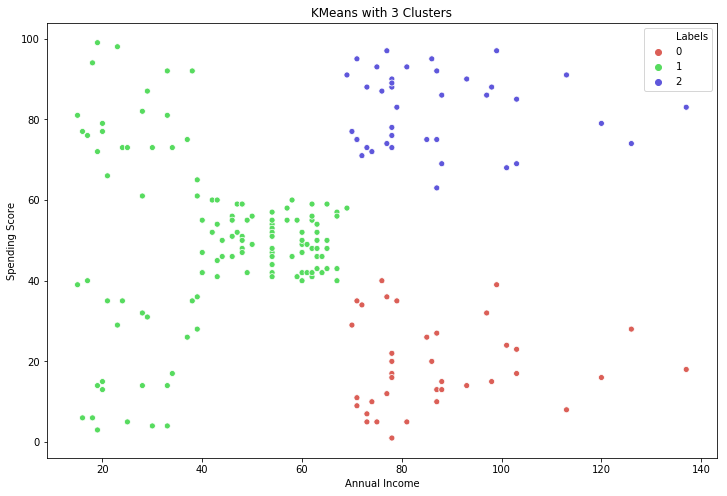

In [12]:
# 3 cluster
clusters_3 = KMeans(n_clusters=3).fit(data_for_clustering)

data_for_clustering['Labels'] = clusters_3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data_for_clustering['Annual Income'], data_for_clustering['Spending Score'], hue=data_for_clustering['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

### 5 Clusters

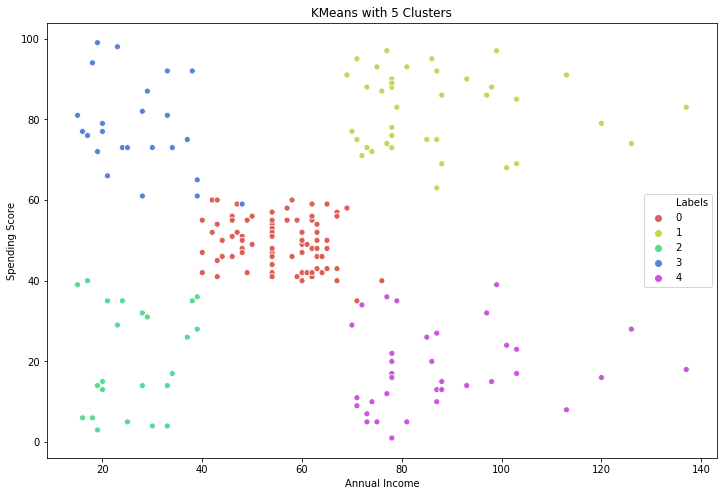

In [13]:
# 5 cluster
clusters_5 = KMeans(n_clusters=5).fit(data_for_clustering)

data_for_clustering['Labels'] = clusters_5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(data_for_clustering['Annual Income'], data_for_clustering['Spending Score'], hue=data_for_clustering['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

- __5 seems better than 3__
- Plotting 5

- Label 0 - High Income, High Score
- Label 1 - Low Income, Low Score
- Label 2 - Medium Income, Medium Score
- abel 3 - High Income, Low Score
- Label 4 - Low Income, High Score

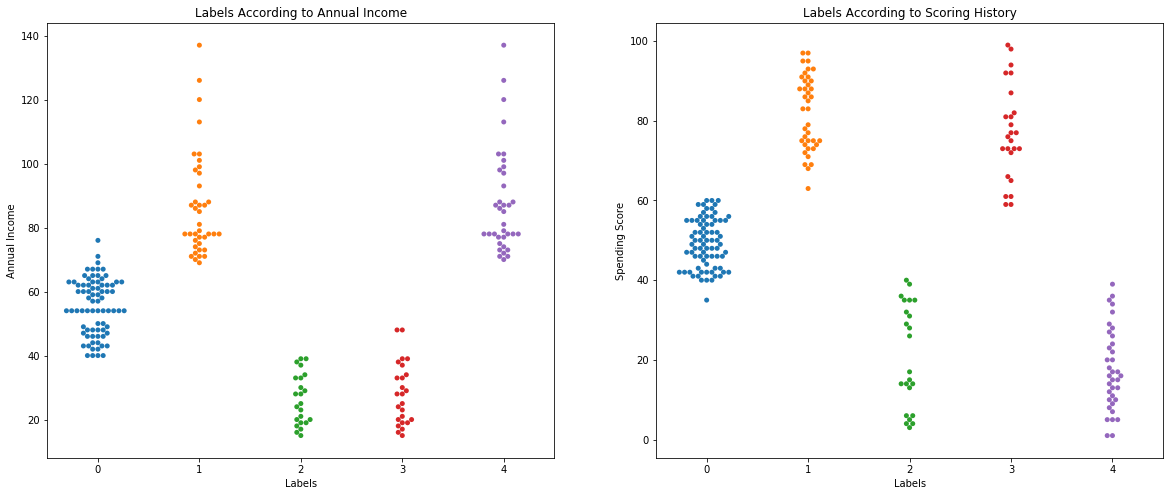

In [14]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Annual Income', data=data_for_clustering, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spending Score', data=data_for_clustering, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()